In [111]:
#importing Required libraries
import pandas as pd
import numpy as np
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
print("done")

done


In [112]:
#importing and examining the Dataset
df=pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [113]:
#examining the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


In [114]:
#checking the percent of missing values in the dataset
df.isnull().sum()/len(df)*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [115]:
#fixing the datetime columns
df['Request timestamp'] = df['Request timestamp'].astype('datetime64[ns]')
df["Request timestamp"]= df["Request timestamp"].astype(object).apply(lambda x: x.replace(day=x.month,month=7)  if x.month>7 else x)
df['Drop timestamp'] = df['Drop timestamp'].astype('datetime64[ns]')
df["Drop timestamp"]= df["Drop timestamp"].astype(object).apply(lambda x: x.replace(day=x.month,month=7)  if x.month>7 else x)
#Drop timestamp
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [116]:
#checking the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [117]:
#checking the percent of missing values in the dataset
df.isnull().sum()/len(df)*100
#the missing values are not fixed as they dont interfere wit our analysis.

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [118]:
#createing new Derived columns
# the date and day of the week columns are ot needed for our analysis as they are very few

df["Requested_Date"]=[dt.day for dt in df["Request timestamp"].astype(object)]
df["Requested_Hour"]=[dt.hour for dt in df["Request timestamp"].astype(object)]
df["Requested_Month"]=[dt.month for dt in df["Request timestamp"].astype(object)]
df["Requested_Day_Of_Week"]=[calendar.day_name[dt.weekday()] for dt in df["Request timestamp"].astype(object)]
df['Requested_Day_Of_Week'] = pd.Categorical(df['Requested_Day_Of_Week'], ["Monday", "Tuesday", "Wednesday","Thursday","Friday"])

df["Drop_Date"]=[dt.day for dt in df["Drop timestamp"].astype(object)]
df["Drop_Hour"]=[dt.hour for dt in df["Drop timestamp"].astype(object)]
df["Drop_Month"]=[dt.month for dt in df["Drop timestamp"].astype(object)]
df["Drop_Day_Of_Week"]=[calendar.day_name[dt.weekday()]  if type(dt.weekday()) == int   else "" for dt in df["Drop timestamp"].astype(object)]
df['Drop_Day_Of_Week'] = pd.Categorical(df['Drop_Day_Of_Week'], ["Monday", "Tuesday", "Wednesday","Thursday","Friday"])

df["Demand_Not_Filled"]=df["Status"].apply(lambda x:1 if x!="Trip Completed" else 0)
df["Demand_Filled"]=df["Status"].apply(lambda x:1 if x=="Trip Completed" else 0)
df["Cancelled"]=df["Status"].apply(lambda x:1 if x=="Cancelled" else 0)


df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested_Date,Requested_Hour,Requested_Month,Requested_Day_Of_Week,Drop_Date,Drop_Hour,Drop_Month,Drop_Day_Of_Week,Demand_Not_Filled,Demand_Filled,Cancelled
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,7,Monday,11.0,13.0,7.0,Monday,0,1,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17,7,Monday,11.0,18.0,7.0,Monday,0,1,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9,7,Tuesday,12.0,9.0,7.0,Tuesday,0,1,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21,7,Tuesday,12.0,22.0,7.0,Tuesday,0,1,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,7,Wednesday,13.0,9.0,7.0,Wednesday,0,1,0


In [119]:
#exporting the corrected dataset for tableau analysis
df.to_csv("Corrected_Data_Data.csv")

In [120]:
#analysing the percent of Cancelled rides and Not available rides for airport and city
PerDf=df.groupby(['Pickup point']).agg({'Cancelled':'sum','Demand_Not_Filled':"sum"}).reset_index()
PerDf['Cancelled']=PerDf['Cancelled']/len(df)*100
PerDf['Car_Not_Available']=(PerDf['Demand_Not_Filled']-PerDf['Cancelled'])/len(df)*100
PerDf.drop(['Demand_Not_Filled'], axis=1,inplace=True)
PerDf

,Pickup point,Cancelled,Car_Not_Available
0,Airport,2.935508,28.288577
1,City,15.804299,29.461760


In [121]:
print("as we can see the car not available percent is for both airport and city")
print("But the Rate of cancellation is a lot higher in the city than the airport")

as we can see the car not available percent is for both airport and city
But the Rate of cancellation is a lot higher in the city than the airport


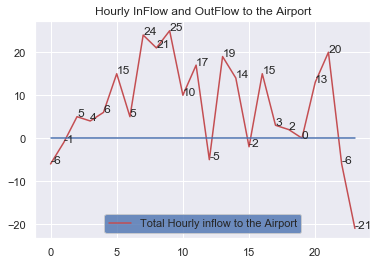

In [122]:
#Hourly InFlow and OutFlow to the Airport
#Considering the demand fullfiled from the city as inflow and  demand fullfiled from the airport as Outflow
GropuedDf=df.groupby(['Pickup point',"Requested_Hour"]).agg({'Request id':'count','Demand_Not_Filled':"sum",'Demand_Filled':'sum','Cancelled':'sum'}).reset_index()

X=GropuedDf[GropuedDf['Pickup point']=="Airport"]["Requested_Hour"]
Y=GropuedDf[GropuedDf['Pickup point']=="Airport"]["Demand_Filled"]
Y1=GropuedDf[GropuedDf['Pickup point']=="City"]["Demand_Filled"]
Y1.index = pd.RangeIndex(len(Y1.index))
Y=Y1-Y
zero=[0] * 24
#print(X.head())
#print(Y.head())

plt.plot(X,Y,'r',X,zero,'b')
plt.title('Hourly InFlow and OutFlow to the Airport')
#ax1.set_xlim([range(0,24)])

for i,j in zip(X,Y):
    plt.annotate('%s' %j, xy=(i,j))    

legend = plt.legend(['Total Hourly inflow to the Airport'],loc='lower center')


legend.get_frame().set_facecolor('C0')

plt.show();


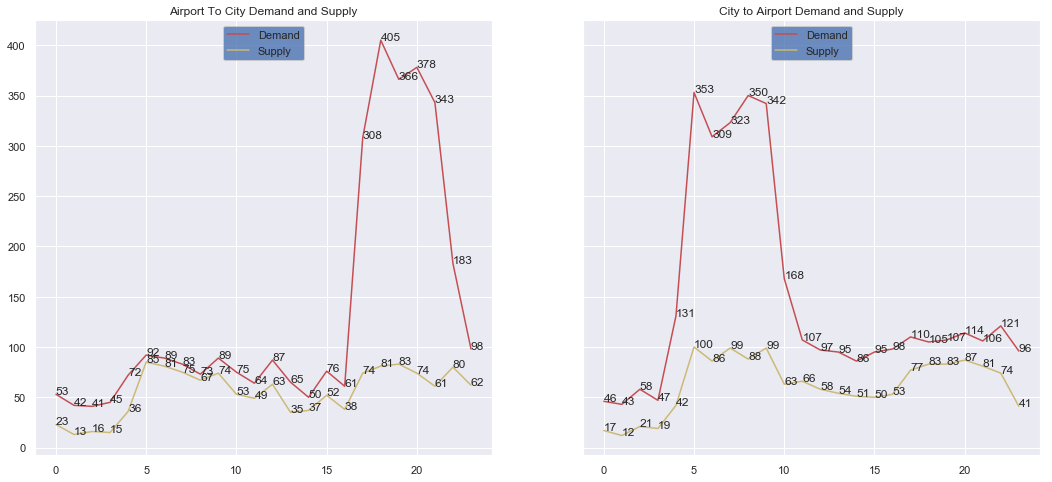

In [123]:
#Demand Supply Graph Comparing Airport To City and City to Airport



X=GropuedDf[GropuedDf['Pickup point']=="Airport"]["Requested_Hour"]
Y=GropuedDf[GropuedDf['Pickup point']=="Airport"]["Request id"]

Y1=GropuedDf[GropuedDf['Pickup point']=="Airport"]["Demand_Filled"]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18, 8))
ax1.plot(X,Y,'r',X,Y1,'y')
ax1.set_title('Airport To City Demand and Supply')
#ax1.set_xlim([range(0,24)])

for i,j,o in zip(X,Y,Y1):
    ax1.annotate('%s' %j, xy=(i,j))
    ax1.annotate('%s' %o, xy=(i,o))

    legend = ax1.legend(['Demand','Supply'],loc='upper center')


legend.get_frame().set_facecolor('C0')


X=GropuedDf[GropuedDf['Pickup point']=="City"]["Requested_Hour"]
Y=GropuedDf[GropuedDf['Pickup point']=="City"]["Request id"]

Y1=GropuedDf[GropuedDf['Pickup point']=="City"]["Demand_Filled"]

ax2.plot(X,Y,'r',X,Y1,'y')
ax2.set_title('City to Airport Demand and Supply')


for i,j,o in zip(X,Y,Y1):
    ax2.annotate('%s' %j, xy=(i,j))
    ax2.annotate('%s' %o, xy=(i,o))
plt.legend(['Demand','Supply'],loc='upper center').get_frame().set_facecolor('C0')
plt.show();


In [124]:
print("1)As we can see in the airport there is a huge spike in the demand at Night from 5pm to 11pm:")
print("-More driver must be assigned at the night by adding proper incentives such as extra pay")
print("")
print("2)There is also a spike in demand in the early mornings when the day is starting and the drivers are  less")
print("-More driver must be assigned at the night by adding proper incentives such as extra pay")


1)As we can see in the airport there is a huge spike in the demand at Night from 5pm to 11pm:
-More driver must be assigned at the night by adding proper incentives such as extra pay

2)There is also a spike in demand in the early mornings when the day is starting and the drivers are  less
-More driver must be assigned at the night by adding proper incentives such as extra pay


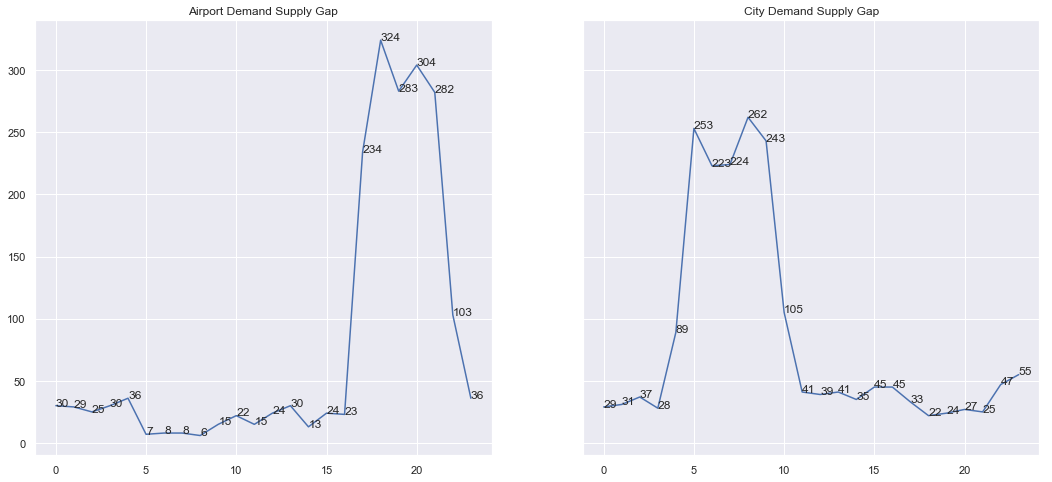

In [125]:
#Graph to check the gap in supply and demand through out the day 

X=GropuedDf[GropuedDf['Pickup point']=="Airport"]["Requested_Hour"]
Y=GropuedDf[GropuedDf['Pickup point']=="Airport"]["Demand_Not_Filled"]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18, 8))
ax1.plot(X,Y)
ax1.set_title('Airport Demand Supply Gap')
#ax1.set_xlim([range(0,24)])

for i,j in zip(X,Y):
    ax1.annotate('%s' %j, xy=(i,j))



X1=GropuedDf[GropuedDf['Pickup point']=="City"]["Requested_Hour"]
Y1=GropuedDf[GropuedDf['Pickup point']=="City"]["Demand_Not_Filled"]


ax2.plot(X1,Y1)
ax2.set_title('City Demand Supply Gap')


for i,j in zip(X1,Y1):
    ax2.annotate('%s' %j, xy=(i,j))


plt.show();
#GropuedDf.head()

In [126]:
print("the most problematic types of requests: Airport to City")
print("For Airport to City the most Probalatic time is at the Night from 17:00 to 23:00")
print("For City to Airport the most Probalatic time is from Early Morning to before the Afternoon from 04:00 to 11:00")



the most problematic types of requests: Airport to City
For Airport to City the most Probalatic time is at the Night from 17:00 to 23:00
For City to Airport the most Probalatic time is from Early Morning to before the Afternoon from 04:00 to 11:00


In [127]:
print("1)As we can see in the airport there is a huge spike in the demand at Night from 5pm to 11pm:")
print("-More driver must be assigned at the night by adding proper incentives such as extra pay")
print("")
print("2)There is also a spike in demand in the early mornings from 04:00am to 11:00am:")
print("-More driver must be assigned at the night by adding proper incentives such as extra pay")


1)As we can see in the airport there is a huge spike in the demand at Night from 5pm to 11pm:
-More driver must be assigned at the night by adding proper incentives such as extra pay

2)There is also a spike in demand in the early mornings from 04:00am to 11:00am:
-More driver must be assigned at the night by adding proper incentives such as extra pay


In [128]:
print("End Of case study")

End Of case study
